## Massachusetts Public School Data Play

### Data is available [here](https://www.kaggle.com/ndalziel/massachusetts-public-schools-data)

### It includes a data dictionary to help clarify the 300+ fields

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import seaborn as sns
%matplotlib inline

In [2]:
#load in dataset

massdata = pd.io.parsers.read_csv('MA_Public_Schools_2017.csv', dtype={'Zip': 'str'})

massdata.head()

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,2351,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
1,10003,Beaver Brook Elementary School,Public School,Principal,Catherine Zinni,1 Ralph Hamlin Lane,NaN,Abington,MA,2351,...,NaN,Level 3,Among lowest performing 20% of subgroups,34.0,69.0,73.0,Level 3,One or more schools in the district classified...,63.0,60.0
2,10002,Center Elementary School,Public School,Principal,Lora Monachino,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 3,One or more schools in the district classified...,63.0,60.0
3,10405,Frolio Middle School,Public School,Principal,Matthew MacCurtain,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,40.0,63.0,64.0,Level 3,One or more schools in the district classified...,63.0,60.0
4,10015,Woodsdale Elementary School,Public School,Principal,Jonathan Hawes,128 Chestnut Street,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,52.0,65.0,67.0,Level 3,One or more schools in the district classified...,63.0,60.0


In [3]:
#You can see above that zip codes are missing '0' before the last four zip digits. Every MA zip starts with 0.

massdata['Zip'] = '0' + massdata['Zip'].astype(str)

massdata['Zip']



0       02351
1       02351
2       02351
3       02351
4       02351
5       02743
6       02743
7       01001
8       01001
9       01030
10      01001
11      01030
12      01001
13      01001
14      01001
15      01913
16      01913
17      01913
18      01913
19      01913
20      01002
21      01002
22      01002
23      01810
24      01810
25      01810
26      01810
27      01810
28      01810
29      01810
        ...  
1831    01610
1832    01607
1833    01605
1834    01602
1835    01610
1836    01606
1837    01604
1838    01605
1839    01098
1840    02093
1841    02093
1842    02724
1843    01104
1844    01970
1845    02119
1846    02740
1847    01851
1848    01022
1849    01103
1850    02361
1851    01301
1852    02301
1853    01566
1854    01041
1855    01105
1856    01906
1857    01105
1858    02032
1859    02124
1860    02114
Name: Zip, dtype: object

### English as a Second Language

#### How do ESL rates vary around the state of MA for high schools? Where do we find more and less students with English as a second language?


In [4]:
# Step 1 - confine the dataset to high schools

masshigh = massdata[massdata.Grade == '09,10,11,12']

masshigh.head(25)

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,02351,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
8,50505,Agawam High,Public School,Principal,Thomas Schnepp,760 Cooper Street,NaN,Agawam,MA,01001,...,263.0,Level 2,Not meeting gap narrowing goals,41.0,65.0,61.0,Level 2,One or more schools in the district classified...,54.0,56.0
16,70505,Amesbury High,Public School,Principal,Elizabeth McAndrews,5 Highland Street,NaN,Amesbury,MA,01913,...,133.0,Level 2,Not meeting gap narrowing goals,53.0,67.0,66.0,Level 2,One or more schools in the district classified...,50.0,46.0
17,70515,Amesbury Innovation High School,Public School,Principal,Eryn Maguire,71 Friend Street,NaN,Amesbury,MA,01913,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 2,One or more schools in the district classified...,50.0,46.0
23,90505,Andover High,Public School,Principal,Philip Conrad,80 Shawsheen Road,NaN,Andover,MA,01810,...,310.0,Level 2,Not meeting gap narrowing goals,81.0,85.0,64.0,Level 2,One or more schools in the district classified...,83.0,57.0
33,100505,Arlington High,Public School,Principal,Matthew Janger,869 Mass Avenue,NaN,Arlington,MA,02476,...,264.0,Level 1,Meeting gap narrowing goals,73.0,79.0,86.0,Level 2,One or more schools in the district classified...,76.0,56.0
43,140505,Ashland High,Public School,Principal,Kelley St. Coeur,65 East Union St.,NaN,Ashland,MA,01721,...,164.0,Level 1,Meeting gap narrowing goals,89.0,94.0,88.0,Level 2,One or more schools in the district classified...,72.0,73.0
49,160515,Attleboro Community Academy,Public School,Principal,William Runey,100 Rathbun Willard Drive,NaN,Attleboro,MA,02703,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 2,One or more schools in the district classified...,64.0,52.0
50,160505,Attleboro High,Public School,Principal,William Runey,100 Rathbun Willard Drive,NaN,Attleboro,MA,02703,...,370.0,Level 2,Not meeting gap narrowing goals,30.0,75.0,65.0,Level 2,One or more schools in the district classified...,64.0,52.0
78,240505,Belchertown High,Public School,Principal,Christine Vigneux,142 Springfield Road,NaN,Belchertown,MA,01007,...,157.0,Level 1,Meeting gap narrowing goals,84.0,95.0,82.0,Level 2,One or more schools in the district classified...,67.0,49.0


In [5]:
# from this highschool data, grab the fields of interest. 
#These include school name and location, ESL data, school demo data and SAT data

eslcols = [0,1,5,6,7,8,9,13,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52,93,94,95,96]

print(masshigh.iloc[:, eslcols].columns)

massESL = masshigh.iloc[:, eslcols]

massESL.head()

Index(['School Code', 'School Name', 'Address 1', 'Address 2', 'Town', 'State',
       'Zip', 'District Name', 'First Language Not English',
       '% First Language Not English', 'English Language Learner',
       '% English Language Learner', 'Students With Disabilities',
       '% Students With Disabilities', 'High Needs', '% High Needs',
       'Economically Disadvantaged', '% Economically Disadvantaged',
       '% African American', '% Asian', '% Hispanic', '% White',
       '% Native American', '% Native Hawaiian, Pacific Islander',
       '% Multi-Race, Non-Hispanic', '% Males', '% Females',
       'Number of Students', 'SAT_Tests Taken', 'Average SAT_Reading',
       'Average SAT_Writing', 'Average SAT_Math'],
      dtype='object')


,School Code,School Name,Address 1,Address 2,Town,State,Zip,District Name,First Language Not English,% First Language Not English,...,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Number of Students,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math
0,10505,Abington High,201 Gliniewicz Way,NaN,Abington,MA,02351,Abington,24.0,5.3,...,0.2,0.2,0.9,45.6,54.4,451.0,98.0,520.0,498.0,516.0
8,50505,Agawam High,760 Cooper Street,NaN,Agawam,MA,01001,Agawam,56.0,4.6,...,0.0,0.1,1.9,52.0,48.0,1242.0,234.0,496.0,475.0,514.0
16,70505,Amesbury High,5 Highland Street,NaN,Amesbury,MA,01913,Amesbury,17.0,2.9,...,0.0,0.0,2.5,53.5,46.5,621.0,115.0,531.0,518.0,534.0
17,70515,Amesbury Innovation High School,71 Friend Street,NaN,Amesbury,MA,01913,Amesbury,0.0,0.0,...,0.0,0.0,6.5,64.5,35.5,33.0,2.0,NaN,NaN,NaN
23,90505,Andover High,80 Shawsheen Road,NaN,Andover,MA,01810,Andover,172.0,9.5,...,0.1,0.0,2.2,48.9,51.1,1799.0,393.0,566.0,562.0,581.0


Text(0.5,1,'Distribution of ESL Student Rates among MA Public Schools')

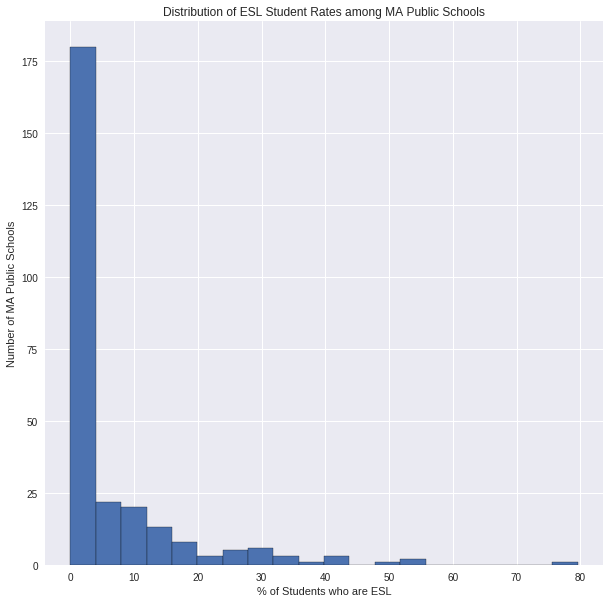

In [6]:
#plot histogram of ESL Frequency across all MA High Schools

x = massESL['% English Language Learner'].dropna()  # example data, random normal distribution
num_bins = 20
fig = plt.figure(figsize = (10,10))
eslHist = fig.add_subplot(1,1,1)
eslHist.hist(x, bins = num_bins, edgecolor='black')
eslHist.set_xlabel(r"% of Students who are ESL")
eslHist.set_ylabel(r"Number of MA Public Schools")
eslHist.set_title(r"Distribution of ESL Student Rates among MA Public Schools")

In [20]:
#Identify the Schools where more than 30% of students are ESL students.
#These schools are concentrated in three areas: Boston, Worcester and Lawrence

massESL.iloc[:, 4:12][massESL['% English Language Learner'] > 30]

,Town,State,Zip,District Name,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner
123,Dorchester,MA,02124,Boston,378.0,100.0,301.0,79.6
127,Brighton,MA,02135,Boston,481.0,59.3,337.0,41.6
131,Charlestown,MA,02129,Boston,563.0,61.9,378.0,41.5
134,Dorchester,MA,02122,Boston,167.0,45.8,113.0,31.0
148,East Boston,MA,02128,Boston,1147.0,76.7,649.0,43.4
172,Dorchester,MA,02121,Boston,243.0,49.7,168.0,34.4
189,Roxbury,MA,02120,Boston,480.0,57.1,283.0,33.7
191,Boston,MA,02130,Boston,240.0,84.5,144.0,50.7
219,Jamaica Plain,MA,02130,Boston,300.0,54.2,209.0,37.8
262,Brockton,MA,02301,Brockton,98.0,64.1,80.0,52.3


### Unsuprisingly, the higher rates of ESL students appear to be concentrated in the most urban parts of the state like Boston and Worcester. From here, I put together some maps displaying ESL frequency based on the zipcodes of the schools. I use basemap which is a matplotlib package to build the maps.

### The next cell loads a table of zipcode coordinates, and it was downloaded [here](https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/)

In [8]:
zipData = pd.io.parsers.read_table('2016_Gaz_zcta_national.txt', dtype={'GEOID':'str'})

zipData = zipData.groupby(by = 'GEOID').sum()

zipData.head()

,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
GEOID,,,,,,
00601,166659884,799293,64.348,0.309,18.180555,-66.749961
00602,79287203,4448761,30.613,1.718,18.361945,-67.175597
00603,81884707,183895,31.616,0.071,18.455183,-67.119887
00606,109579998,12487,42.309,0.005,18.158345,-66.932911
00610,93020979,4171994,35.916,1.611,18.295366,-67.125135


In [9]:
#I am going to group the high school data by zip code and grab the total number of students and the number of esl students.
#from there, I will calculate the % of ESL students by zip code.
#finally, add latitude and longitude from the zipData dataframe
#there is some missing longitude and latitude data unfortunately.

massESLZip = massESL.iloc[:, [6, 10, -5]].groupby(by='Zip', sort = True).sum()

massESLZip['% ESL'] = Series((100* massESLZip['English Language Learner'] / massESLZip['Number of Students'])) 

massESLZip = massESLZip.join(zipData, how = 'left')

massESLZip.head()



,English Language Learner,Number of Students,% ESL,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
Zip,,,,,,,,,
01001,16.0,1242.0,1.288245,29731610.0,2118827.0,11.479,0.818,42.062368,-72.625754
01002,39.0,926.0,4.211663,142617829.0,4276681.0,55.065,1.651,42.364060,-72.458741
01005,1.0,732.0,0.136612,114637908.0,666424.0,44.262,0.257,42.418848,-72.106598
01007,1.0,707.0,0.141443,136236049.0,6944239.0,52.601,2.681,42.279010,-72.400468
01020,81.0,2450.0,3.306122,32307392.0,1170576.0,12.474,0.452,42.172602,-72.562073


### The next cells use basemap to build a map of Massachusetts. The first one shows schools were ESL > 10% and the second shows ESL < 10%


### A couple points to note:

* I relied upon this [example](http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)
* The high resolution is a separate download from the base basemap package
* When tinkering with graph, set resolution to crude or 'c' so that the map renders quicker

/home/lkash/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/lkash/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


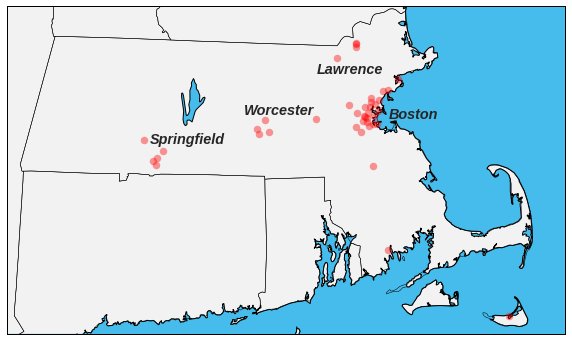

In [10]:
#Massachusetts Boundaries via http://boundingbox.klokantech.com/
fig, ax = plt.subplots(figsize = (10,20))
westlimit=-73.6; southlimit=41.2; eastlimit=-69.7; northlimit=42.9

m = Basemap(resolution = 'h',
           projection = 'merc',
           lat_0=42.1, lon_0=-71.7,
            llcrnrlon=-73.6, llcrnrlat= 41.2, urcrnrlon=-69.7, urcrnrlat=42.9)

m.readshapefile('st99_d00', name='states', drawbounds=True)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

long, lat = m(massESLZip.iloc[:, 8][massESLZip['% ESL'] > 10].as_matrix(), massESLZip.iloc[:, 7][massESLZip['% ESL'] > 10].as_matrix())

cityLabels =[
    ('Boston', (-71.058880, 42.360082), (-70.93, 42.380082)),
    ('Worcester', (-71.802293, 42.262593), (-71.802293-0.14, 42.262593+0.14)),
    ('Springfield', (-72.581561, 42.107254), (-72.6, 42.25)),
    ('Lawrence', (-71.163114, 42.707035), (-71.163114-0.27, 42.6635-0.05))    
]

for label, citycoords, labelcoords in cityLabels:
    x, y = m(citycoords[0], citycoords[1])
    xtext, ytext = m(labelcoords[0], labelcoords[1])
    plt.annotate(label, xy=(x, y), xytext=(xtext, ytext),
                 horizontalalignment = 'left', verticalalignment = 'top',
                fontsize = 'x-large', fontstyle = 'oblique', weight = 'heavy')


m.plot(long, lat, 'r.', alpha = 0.4, markersize = 15)

plt.show()


/home/lkash/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/lkash/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


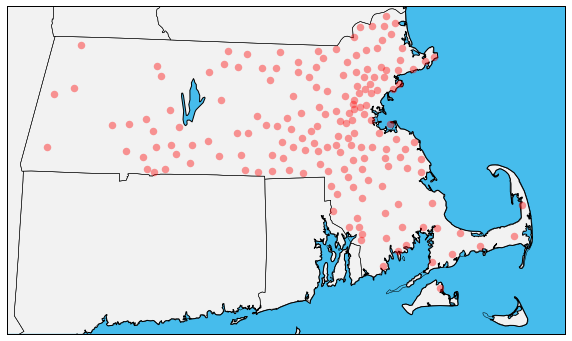

In [22]:
#Massachusetts Boundaries via http://boundingbox.klokantech.com/
fig, ax = plt.subplots(figsize = (10,20))
westlimit=-73.6; southlimit=41.2; eastlimit=-69.7; northlimit=42.9

m = Basemap(resolution = 'h',
           projection = 'merc',
           lat_0=42.1, lon_0=-71.7,
            llcrnrlon=-73.6, llcrnrlat= 41.2, urcrnrlon=-69.7, urcrnrlat=42.9)

m.readshapefile('st99_d00', name='states', drawbounds=True)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

long, lat = m(massESLZip.iloc[:, 8][massESLZip['% ESL'] < 10].as_matrix(), massESLZip.iloc[:, 7][massESLZip['% ESL'] < 10].as_matrix())



m.plot(long, lat, 'r.', alpha = 0.4, markersize = 15)

plt.show()